
# <center>JSON exercise</center>

Using data in file `data/world_bank_projects.json` and the techniques demonstrated above,
1. Find the 10 countries with most projects 
2. Find the top 10 major project themes (using column `mjtheme_namecode`)
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

----------

## 1. Find the 10 countries with most projects

In [116]:
# import libraries
import pandas as pd
from collections import Counter

In [117]:
# read the 'world_bank_projects.json' data into a dataframe
df = pd.read_json('data/world_bank_projects.json')
# see the head of the dataframe
df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [118]:
# value_counts() returns a series containing counts of unique values
# top 10 countries with the most projects
top_ten_countries = df.countryname.value_counts().head(10)
top_ten_countries

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [127]:
# converting the pandas series to a dataframe
df = top_ten_countries.to_frame()
# create a column from the index of df
df['country'] = df.index
# reset the index of df
df.reset_index(drop=True)

,countryname,country
0,19,People's Republic of China
1,19,Republic of Indonesia
2,17,Socialist Republic of Vietnam
3,16,Republic of India
4,13,Republic of Yemen
5,12,People's Republic of Bangladesh
6,12,Nepal
7,12,Kingdom of Morocco
8,11,Africa
9,11,Republic of Mozambique


In [128]:
# import matplotlib to visualize the top 10 countries with the most projects
import matplotlib.pyplot as plt

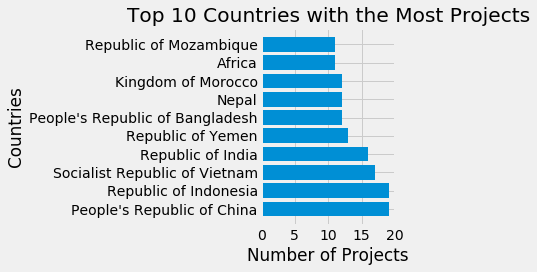

In [129]:
plt.style.use('fivethirtyeight')
plt.barh(df.country, df.countryname)
plt.title('Top 10 Countries with the Most Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Countries')
plt.xticks([0,5,10,15,20])
plt.tight_layout()
plt.show()

-

------

## 2. Find the top 10 major project themes (using column `mjtheme_namecode`)

In [20]:
# see the head of mjtheme_namecode column
df.mjtheme_namecode.head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [21]:
# since the rows of mjtheme_namecode column has lists in each row, 
# extract the lists and assign it to a list called 'theme'
theme = df.mjtheme_namecode

In [22]:
# here, see that lists have dictionaries inside and each list
# have different number of dictionaries
theme[0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [23]:
# create a separate list to append 'codes' from each dictionary
theme_list = []
for row in theme:
    for entry in row:
        theme_list.append(entry['code'])

In [ ]:
# list of codes
theme_list

In [24]:
# count the values in theme_list and get the top 10. 
Counter(theme_list).most_common(10)

[('11', 250),
 ('10', 216),
 ('8', 210),
 ('2', 199),
 ('6', 168),
 ('4', 146),
 ('7', 130),
 ('5', 77),
 ('9', 50),
 ('1', 38)]

## Question-2 alternative

In [37]:
import json
from pandas.io.json import json_normalize

In [60]:
# load json as string into a list called df
df = json.load((open('data/world_bank_projects.json')))

In [61]:
# flatten the 'mjtheme_namecode' column and save it into a dataframe: df
df = json_normalize(df, 'mjtheme_namecode')
df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [64]:
# counts the project themes using the 'code' column and save it into
# major_project_themes
major_project_themes = df.code.value_counts()

In [65]:
# save the top 10 major projects
top_ten_maj_project = major_project_themes.head(10)
top_ten_maj_project

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

-----

## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [25]:
# create an empty dictionary: theme_dict
theme_dict = {}
# extract the themes' names from each row
for row in theme:
    for entry in row:
        # check if 'name' in each dictionary equals '' (missing)
        if entry['name']=='':
            pass
        # append 'code' and 'name' into theme_dict if they are not already 
        # appended to the theme_dict 
        elif entry['code'] not in theme_dict.keys():
            theme_dict[entry['code']]=entry['name']
        else:
            pass

In [33]:
# now, theme_dict has codes and names associated with each code. 
theme_dict

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [34]:
# create a function to apply to 'mjtheme_namecode' column to fill missing values
def fill_missing(dict_list):
    theme_dict = {'8': 'Human development','1': 'Economic management',
                  '6': 'Social protection and risk management',
                  '5': 'Trade and integration','2': 'Public sector governance',
                  '11': 'Environment and natural resources management',
                  '7': 'Social dev/gender/inclusion',
                  '4': 'Financial and private sector development',
                  '10': 'Rural development','9': 'Urban development','3': 'Rule of law'}
    item_list = []
    for item in dict_list:
        if item['name']=='':
            item['name']=theme_dict[item['code']]
        item_list.append(item)
    return item_list

In [35]:
# apply the function to 'mjtheme_namecode' column and assign it to
# a new column - 'themes_filled'
#old_column = df.mjtheme_namecode.copy()
df['themes_filled']= df.mjtheme_namecode.apply(fill_missing)

In [29]:
# since the question wants us to create a new dataframe, assign df to df_new
# check the head of the df_new
df_new = df
df_new.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id,themes_filled
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'},"[{'code': '8', 'name': 'Human development'}, {..."
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'},"[{'code': '1', 'name': 'Economic management'},..."
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'},"[{'code': '5', 'name': 'Trade and integration'..."
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'},"[{'code': '7', 'name': 'Social dev/gender/incl..."
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'},"[{'code': '5', 'name': 'Trade and integration'..."
